### System of Three Coupled IVPs: Packed Bed Reactor Simulation

This section demonstrates how to solve a system of three coupled ordinary differential equations (ODEs) representing temperature, conversion, and a dimensionless variable in a catalytic packed bed reactor. The system includes explicit algebraic expressions for reaction rate and equilibrium constants.

#### Differential Equations

We solve the following system:

$$
\begin{cases}
\dfrac{dT}{dW} = \dfrac{0.8(T_a - T) + r_A \Delta H}{C_{PA} \cdot F_{A0}} \\
\dfrac{dx}{dW} = -\dfrac{r_A}{F_{A0}} \\
\dfrac{dy}{dW} = -\dfrac{0.015(1 - 0.5x)(T / 450)}{2y}
\end{cases}
$$

#### Explicit Algebraic Expressions

The reaction rate and concentrations are defined as:

$$
\begin{aligned}
R &= 8.314 \quad \text{(gas constant)} \\
k &= 0.5 \cdot \exp\left(5032 \left(\dfrac{1}{450} - \dfrac{1}{T} \right)\right) \\
C_A &= C_0 \cdot \dfrac{(1 - x)(450 / T)}{(1 - 0.5x)} \cdot y \\
C_C &= C_0 \cdot \dfrac{0.5x(450 / T)}{(1 - 0.5x)} \cdot y \\
K_c &= 25000 \cdot \exp\left(\dfrac{\Delta H}{R} \left(\dfrac{1}{450} - \dfrac{1}{T} \right)\right) \\
r_A &= -k \left(C_A^2 - \dfrac{C_C}{K_c} \right)
\end{aligned}
$$

#### Initial Conditions

At $ W = 0 $:

$$
T = 450, \quad x = 0, \quad y = 1
$$

#### Parameters

- $ F_{A0} = 5 $
- $ T_a = 500 $
- $ \Delta H = -40000 $
- $ C_{PA} = 40 $
- $ C_0 = 0.271 $
- $ W \in [0, 20] $

#### Purpose

To simulate the evolution of temperature, conversion, and a dimensionless variable along the reactor using `scipy.integrate.solve_ivp`. This approach is essential for modeling real-world catalytic reactors with nonlinear kinetics and energy balances.

Ref: https://polymathplus.org/

In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [10]:
def reactor(W, vars):
    """
    Packed bed reactor model with three coupled ODEs:
    T' = (0.8*(Ta - T) + rA*delH) / (CPA * FA0)
    x' = -rA / FA0
    y' = -0.015 * (1 - 0.5*x) * (T / 450) / (2*y)
    """

    # Unpack variables
    T, x, y = vars

    # Constants
    R = 8.314
    FA0 = 5
    Ta = 500
    delH = -40000
    CPA = 40
    C0 = 0.271

    # Avoid division by zero or instability
    T = max(T, 1e-6)
    y = max(y, 1e-6)
    denom = max(1 - 0.5 * x, 1e-6)

    # Explicit expressions
    k = 0.5 * np.exp(5032 * (1 / 450 - 1 / T))
    CA = C0 * (1 - x) * (450 / T) / denom * y
    CC = C0 * 0.5 * x * (450 / T) / denom * y
    Kc = 25000 * np.exp(delH / R * (1 / 450 - 1 / T))
    rA = -k * (CA**2 - CC / Kc)

    # Differential equations
    dT_dW = (0.8 * (Ta - T) + rA * delH) / (CPA * FA0)
    dx_dW = -rA / FA0
    dy_dW = -0.015 * (1 - 0.5 * x) * (T / 450) / (2 * y)

    return [dT_dW, dx_dW, dy_dW]

In [11]:
# Initial conditions
T0 = 450
x0 = 0
y0 = 1
W_span = (0, 20)

# Solve the system
solution = solve_ivp(reactor, W_span, [T0, x0, y0], method='BDF', dense_output=True)

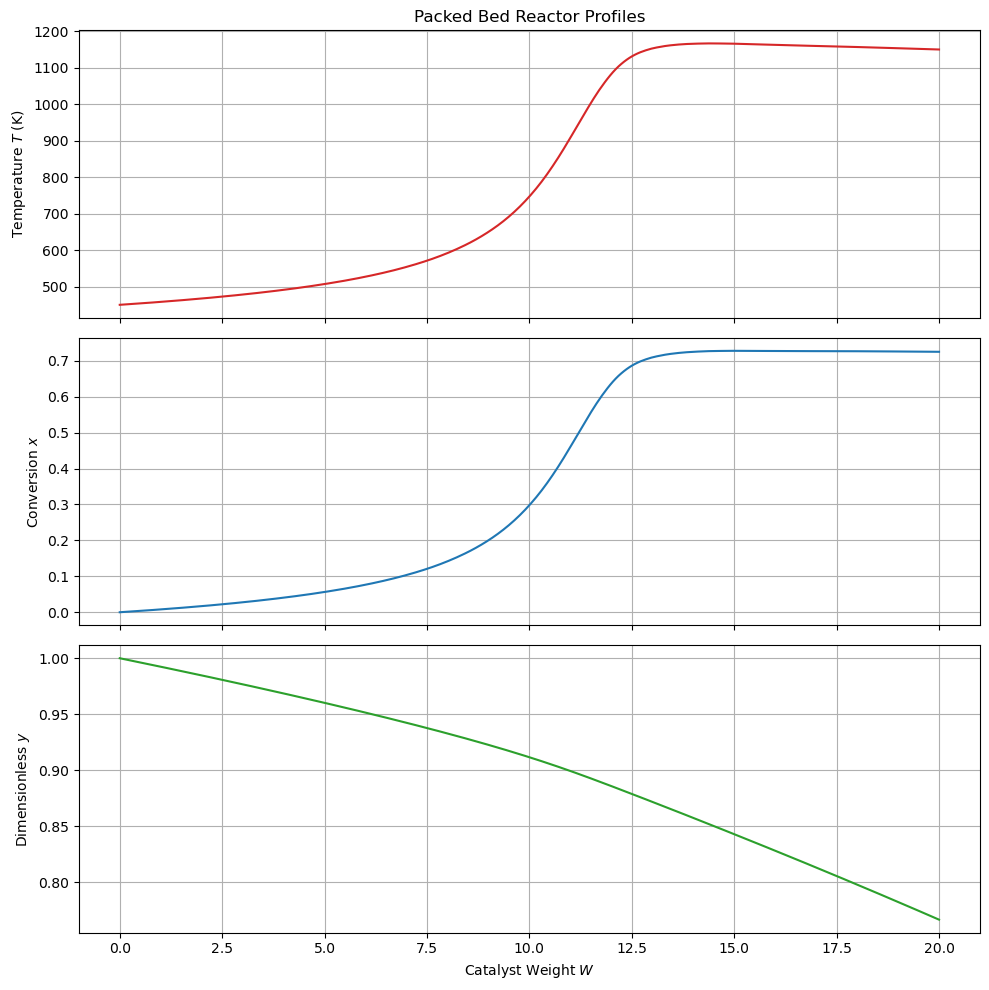

In [12]:
# Generate points for plotting
W_vals = np.linspace(W_span[0], W_span[1], 300)
T_vals, x_vals, y_vals = solution.sol(W_vals)

# Create subplots for T, x, y
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Temperature subplot
axs[0].plot(W_vals, T_vals, color='tab:red')
axs[0].set_ylabel('Temperature $T$ (K)')
axs[0].set_title('Packed Bed Reactor Profiles')
axs[0].grid(True)

# Conversion subplot
axs[1].plot(W_vals, x_vals, color='tab:blue')
axs[1].set_ylabel('Conversion $x$')
axs[1].grid(True)

# Pressure-like variable subplot
axs[2].plot(W_vals, y_vals, color='tab:green')
axs[2].set_xlabel('Catalyst Weight $W$')
axs[2].set_ylabel('Dimensionless $y$')
axs[2].grid(True)

plt.tight_layout()
plt.show()